# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

%matplotlib notebook

import matplotlib.gridspec as gridspec
import random

In [2]:
# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

Text(15.506215359354986, 0.5, 'x4\nUniform')

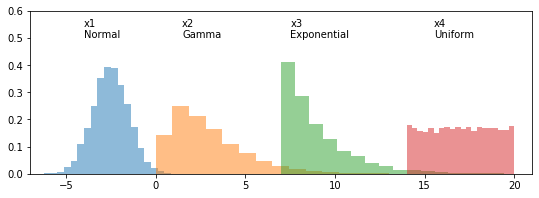

In [3]:
# Original Plot
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

C:\Users\AnishaChinwalla\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\AnishaChinwalla\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice.
C:\Users\AnishaChinwalla\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\AnishaChinwalla\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice.
C:\Users\AnishaChinwalla\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.
C:\Users\AnishaChinwalla\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite valu

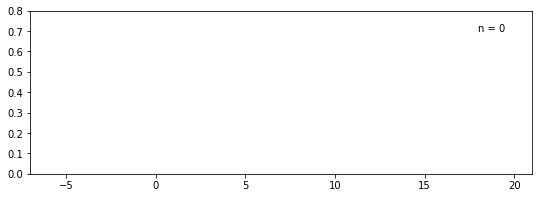

In [4]:
# Animate as 1 plot

## Animation Function
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == 10: 
        a.event_source.stop()
    plt.cla()
    
    sample1 = np.random.choice(x1, replace = False, size = curr*100)
    sample2 = np.random.choice(x2, replace = False, size = curr*100)
    sample3 = np.random.choice(x3, replace = False, size = curr*100)
    sample4 = np.random.choice(x4, replace = False, size = curr*100)
    
    plt.hist(sample1, density=True, bins=20, alpha=0.5)
    plt.hist(sample2, density=True, bins=20, alpha=0.5)
    plt.hist(sample3, density=True, bins=20, alpha=0.5)
    plt.hist(sample4, density=True, bins=20, alpha=0.5);
    plt.axis([-7,21,0,0.8])

    plt.text(sample1.mean()-1.5, 0.5, 'x1\nNormal')
    plt.text(sample2.mean()-1.5, 0.5, 'x2\nGamma')
    plt.text(sample3.mean()-1.5, 0.5, 'x3\nExponential')
    plt.text(sample4.mean()-1.5, 0.5, 'x4\nUniform')
    
    plt.annotate('n = {}'.format(curr*100), [18,0.7])

## Plot Data
fig = plt.figure(figsize=(9,3))
a = animation.FuncAnimation(fig, update, interval=1000)

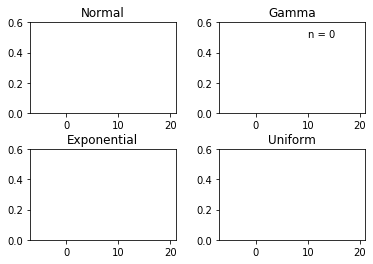

In [5]:
# Animate as subplots

## Animation Function
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == 10: 
        a.event_source.stop()
    plt.cla()
    for n in range(0,len(axs)):
        axs[n].clear()
        sample = np.random.choice(data[n], replace = False, size = curr*100)
        axs[n].hist(sample, density = True, bins = 20)
        axs[n].set_title('{}'.format(names[n]))
        axs[n].axis([-7,21,0,0.6])

    ax2.annotate('n = {}'.format(curr), [10,0.5])

## Plot Data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
axs = [ax1,ax2,ax3,ax4]
data = [x1,x2,x3,x4]
names = ['Normal','Gamma','Exponential','Uniform']

a = animation.FuncAnimation(fig, update, interval=1000)

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

In [10]:

sample

array([-1.81768416, -3.60536588, -2.59431185, -3.73928494, -1.46975737])

Text(10, 0.5, 'n = 10000')

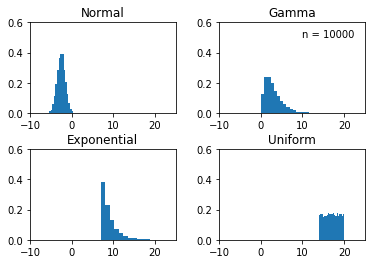

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
axs = [ax1,ax2,ax3,ax4]
data = [x1,x2,x3,x4]
names = ['Normal','Gamma','Exponential','Uniform']

for n in range(0,len(axs)):
    axs[n].axis([-10,25,0,0.6])
    axs[n].hist(data[n], density = True, bins = 20)
    axs[n].set_title('{}'.format(names[n]))
    
ax2.annotate('n = {}'.format(len(x1)), [10,0.5])
